In [343]:
import numpy as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 25)
%matplotlib inline

## Data Description
There are 2 datasets

1. `rotten_tomatoes_movies.csv` - contains basic information about each movie listed on Rotten Tomatoes; each row represents one movie;

2. `rotten_tomatoes_critic_reviews_50k.tsv` - contains 50.000 individual reviews by Rotten Tomatoes critics; each row represents one review corresponding to a movie;

## `rotten_tomatoes_movies` dataset contains the following columns:

`rotten_tomatoes_link` - movie ID

`movie_title - title of the movie as displayed on the Rotten Tomatoes website

`movie_info` - brief description of the movie

`critics_consensus` - comment from Rotten Tomatoes

`content_rating` - category based on the movie suitability for audience

`genres` - movie genres separated by commes, if multiple

`directors` - name of director(s)

`authors` - name of author(s)

`actors` - name of actors

`original_release_date` - date in which the movie has been released in theatres, in YYY-MM-DD format

`streaming_release_date` - date in which the movie has been released on streaming platforms, in YYY-MM-DD format

`runtime` - duration of the movie in minutes

`production_company` - name of a studio/company that produced the movie

`tomatometer_status` - a label assgined by Rotten Tomatoes: "Fresh", "Certified-Fresh" or "Rotten"; this is the target variables in this challenge

`tomatometer_rating` - percentage of positive critic ratings

`tomatometer_count` - critic ratings counted for the calculation of the tomatomer status

`audience_status` - a label assgined based on user ratings: "Spilled" or "Upright"

`audience_rating` - percentage of positive user ratings

`audience_count` - user ratings counted for the calculation of the audience status

`tomatometer_top_critics_count` - number of ratings by top critics

`tomatometer_fresh_critics_count` - number of critic ratings labeled "Fresh"

`tomatometer_rotten_critics_count` - - number of critic ratings labeled "Rotten"


### `rotten_tomatoes_critic_reviews_50k` dataset contains the following columns:

`rotten_tomatoes_link` - movie ID

`critic_name` - name of critic who rated the movie

`top_critic` - boolean value that clarifies whether the critic is a top critic or not

`publisher_name` - name of the publisher for which the critic works

`review_type` - was the review labeled "Fresh" or "Rotten"?

`review_score` - review score provided by the critic

`review_date` - date of the review in YYYY-MM-DD format

`review_content` - text of the review

## Practicalities

Define, train and evaluate a predictive model that takes as the input the data provided. You may want to split the data into training, testing and validation sets, according to your discretion. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You are expected to spend no more than 3 hours working on this project.

In [344]:
df = pd.read_csv('./datasets/rotten_tomatoes_movies.csv')
df1= pd.read_csv('./datasets/rotten_tomatoes_critic_reviews_50k.csv')

In [345]:
df.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [346]:
df.filter(like="run")

,runtime
0,119.0
1,90.0
2,122.0
3,95.0
4,127.0
...,...
17707,104.0
17708,108.0
17709,142.0
17710,135.0


In [347]:
df.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [348]:
 df = df[[
 'content_rating', 
 'genres',
 'runtime',
 'tomatometer_status',
 'tomatometer_rating',
 'tomatometer_count',
 'audience_status',
 'audience_rating',
 'audience_count',
 'tomatometer_top_critics_count',
 'tomatometer_fresh_critics_count',
 'tomatometer_rotten_critics_count']]

lets first quickly see the distribution of the labels to be balance or not

In [349]:
df.isnull().sum()

content_rating                        0
genres                               19
runtime                             314
tomatometer_status                   44
tomatometer_rating                   44
tomatometer_count                    44
audience_status                     448
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64

## 2) Numeric features

In [350]:
numeric = df.select_dtypes(exclude='object').columns.tolist()

In [351]:
num_null = {}
for i, feature in enumerate(numeric):
    num_null[feature] = df[feature].isnull().sum()


In [352]:
num_null

{'runtime': 314,
 'tomatometer_rating': 44,
 'tomatometer_count': 44,
 'audience_rating': 296,
 'audience_count': 297,
 'tomatometer_top_critics_count': 0,
 'tomatometer_fresh_critics_count': 0,
 'tomatometer_rotten_critics_count': 0}

In [353]:
df.loc[df['runtime'].isnull()]

,content_rating,genres,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
170,NR,"Art House & International, Drama",NaN,Fresh,93.0,14.0,Upright,68.0,336.0,5,13,1
217,NR,"Art House & International, Special Interest",NaN,Fresh,81.0,26.0,Upright,100.0,24.0,10,21,5
273,R,"Drama, Horror, Mystery & Suspense",NaN,Rotten,13.0,8.0,Spilled,32.0,1088.0,1,1,7
279,NR,"Comedy, Drama",NaN,Fresh,78.0,32.0,Spilled,52.0,542.0,18,25,7
360,PG,"Classics, Drama",NaN,Fresh,97.0,37.0,Upright,92.0,31748.0,5,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17517,NR,"Documentary, Drama, Special Interest",NaN,Fresh,88.0,34.0,Upright,67.0,3132.0,16,30,4
17542,NR,"Animation, Comedy, Drama",NaN,Fresh,93.0,28.0,Upright,80.0,2994.0,13,26,2
17561,NR,"Art House & International, Drama, Mystery & Su...",NaN,Fresh,70.0,20.0,Spilled,37.0,402.0,3,14,6
17671,NR,Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,26,1


### fill null values of the runtime based on the avrg runtime per genres

In [354]:
avg_runtime_per_genre = df.groupby('genres')['runtime'].mean()
for gen, avg in avg_runtime_per_genre.items():
    df.loc[df['genres'] == gen, 'runtime'] =  df.loc[df['genres'] == gen, 'runtime'].fillna(avg)

In [355]:
df.runtime.isnull().sum()

14

In [356]:
df[numeric].isnull().sum()

runtime                              14
tomatometer_rating                   44
tomatometer_count                    44
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64

In [357]:
df.dtypes

content_rating                       object
genres                               object
runtime                             float64
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

In [358]:
df.genres.nunique()

1106

In [359]:
df = df.drop(columns=['genres'], axis=1)

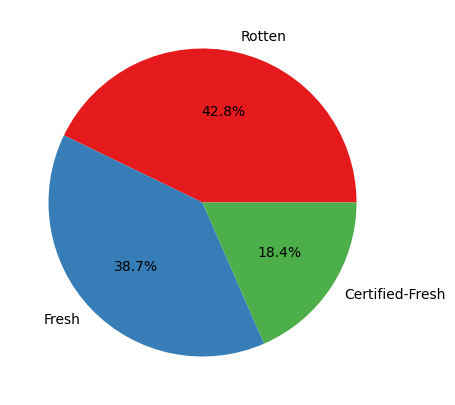

In [360]:
plot, axes = plt.subplots(figsize=(5,5))
axes.pie(x= df['tomatometer_status'].value_counts(), labels=df['tomatometer_status'].value_counts().index, autopct='%.1f%%', colors= sns.set_palette('Set2'))
plt.show()

# Categorical features

In [369]:
#cat.remove('genres')
for feature in cat_:
    if df[feature].nunique() == 2:
        df[feature]=le.fit_transform(df[feature])

KeyError: 'content_rating'

In [362]:
df = pd.get_dummies(data=df, columns=cat, dtype='int')

,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,audience_status_Spilled,audience_status_Upright
0,119.0,Rotten,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,1,0
1,90.0,Certified-Fresh,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,0,1
2,122.0,Fresh,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,1,0
3,95.0,Certified-Fresh,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,0,1
4,127.0,Fresh,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,0,1


## Step 1) `null` take care

## Takeout
at first i wanted to fill the null values of `audience_status` with imputation or simple regression based on the other dependent values (`audience_rating` and	`audience_count`) however the issue is for all the locations that audience_statud is null, slmosr the 2 other is null so it does not kinda make sense to have these in the dataset. so i willdrop these null values for now

In [363]:
df = df.dropna()

In [364]:
df

,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,audience_status_Spilled,audience_status_Upright
0,119.0,Rotten,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,1,0
1,90.0,Certified-Fresh,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,0,1
2,122.0,Fresh,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,1,0
3,95.0,Certified-Fresh,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,0,1
4,127.0,Fresh,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,104.0,Rotten,56.0,9.0,74.0,1195.0,2,5,4,0,0,0,0,0,1,0,1
17708,108.0,Certified-Fresh,98.0,291.0,92.0,101511.0,50,285,7,0,0,0,1,0,0,0,1
17709,142.0,Fresh,80.0,10.0,86.0,7146.0,0,8,2,0,0,1,0,0,0,0,1
17710,135.0,Fresh,96.0,23.0,91.0,30193.0,6,22,1,0,0,0,1,0,0,0,1


## takeout

as we can see for most of the places that (tomatometer_rating	tomatometer_count) are nullthe runtime is also null along with other columns so i decided to just drop the null values as baseline experiment, as ablation study i can later fill these null values with a values either achied by imputation or some other ways for instance filling with the mean in runtime or so, we will experiment this later

ValueError: Could not interpret input 'content_rating'

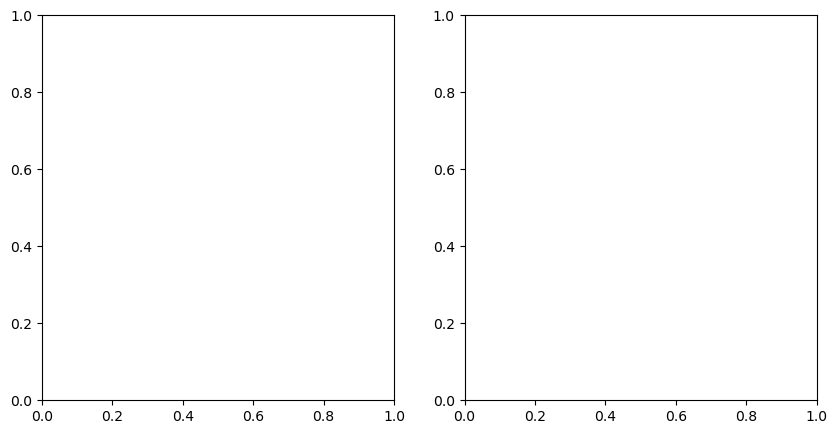

In [365]:
plot, axs = plt.subplots(1,2, figsize=(10,5))
axs.flatten()
for i,feature in enumerate(cat):
    sns.countplot(data=df, x=feature, ax=axs[i], palette='Set1')
    axs[i].set_ylabel('')
    
plt.show()

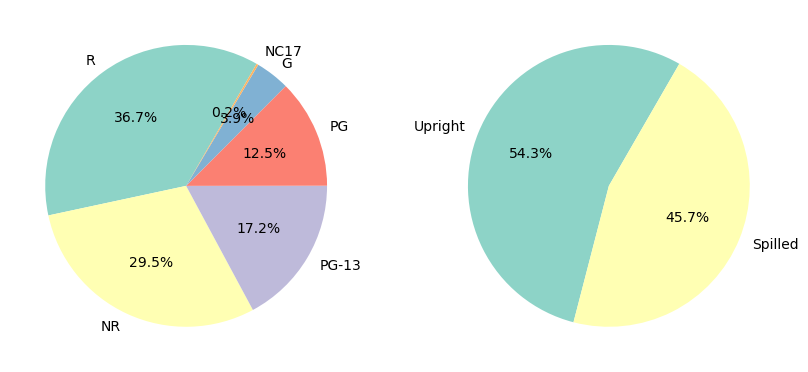

In [329]:
plot, axs = plt.subplots(1,2, figsize=(10,5))
axs.flatten()
for i,feature in enumerate(cat):
    axs[i].pie(x=df[feature].value_counts(), labels=df[feature].value_counts().index, autopct='%.1f%%',startangle=60)
plt.show()

In [366]:
df

,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,audience_status_Spilled,audience_status_Upright
0,119.0,Rotten,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,1,0
1,90.0,Certified-Fresh,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,0,1
2,122.0,Fresh,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,1,0
3,95.0,Certified-Fresh,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,0,1
4,127.0,Fresh,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,104.0,Rotten,56.0,9.0,74.0,1195.0,2,5,4,0,0,0,0,0,1,0,1
17708,108.0,Certified-Fresh,98.0,291.0,92.0,101511.0,50,285,7,0,0,0,1,0,0,0,1
17709,142.0,Fresh,80.0,10.0,86.0,7146.0,0,8,2,0,0,1,0,0,0,0,1
17710,135.0,Fresh,96.0,23.0,91.0,30193.0,6,22,1,0,0,0,1,0,0,0,1


In [367]:
from sklearn.model_selection import train_test_split as tts

In [368]:
X_train, X_test, y_train, y_test = tts(df.drop(['tomatometer_status'], axis=1), df.tomatometer_status, test_size=0.25, random_state=0)
